# House Price Prediction Using Machine Learning

This project predicts housing prices based on features from the California Housing Dataset. The goal is to build a robust regression model and analyze the factors influencing house prices. We use Exploratory Data Analysis (EDA), feature engineering, and model evaluation to achieve this.

## Key Steps:
1. Load and explore the dataset.
2. Perform EDA to understand trends and relationships.
3. Engineer features for improved model performance.
4. Train and evaluate multiple models.
5. Visualize insights and results.


In [1]:
%pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb


Note: you may need to restart the kernel to use updated packages.


# Importing the California price dataset

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [4]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [5]:
#Loading dataset in pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [6]:
#Print 5 Rows of our Dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


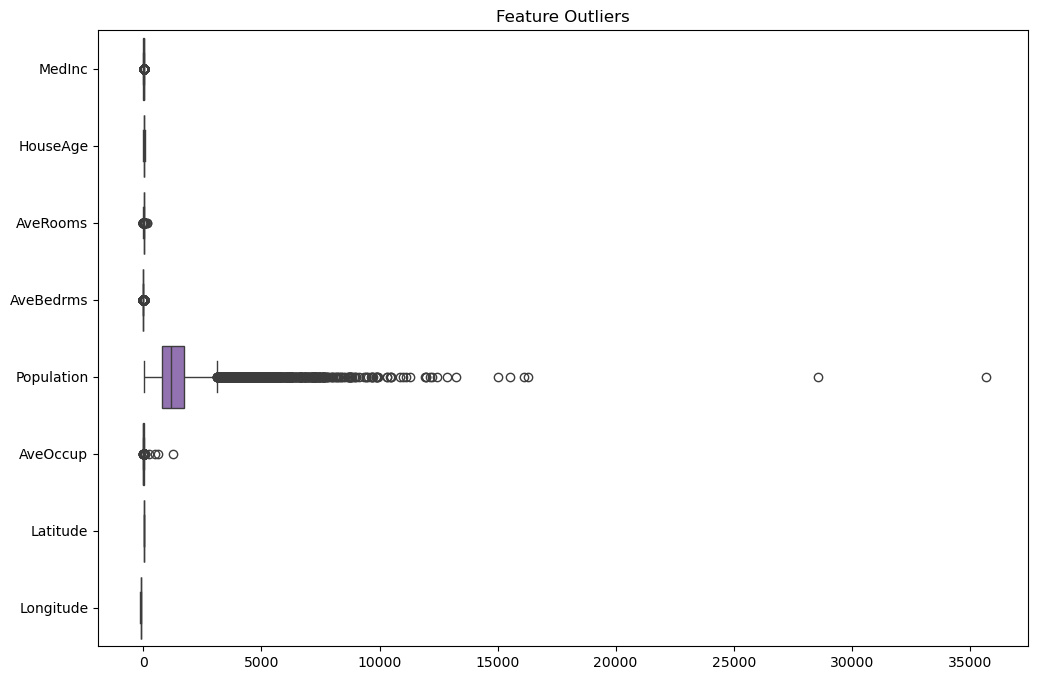

In [7]:
# Boxplot for detecting outliers in features
plt.figure(figsize=(12, 8))
sns.boxplot(data=house_price_dataframe, orient='h')
plt.title('Feature Outliers')
plt.show()


In [8]:
# add the target(price)column in the dataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [9]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
#Checking Number of Rows and Columns in the data frame
house_price_dataframe.shape

(20640, 9)

In [11]:
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [12]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation between various features in the dataset

In [13]:
correlation = house_price_dataframe.corr()

<Axes: >

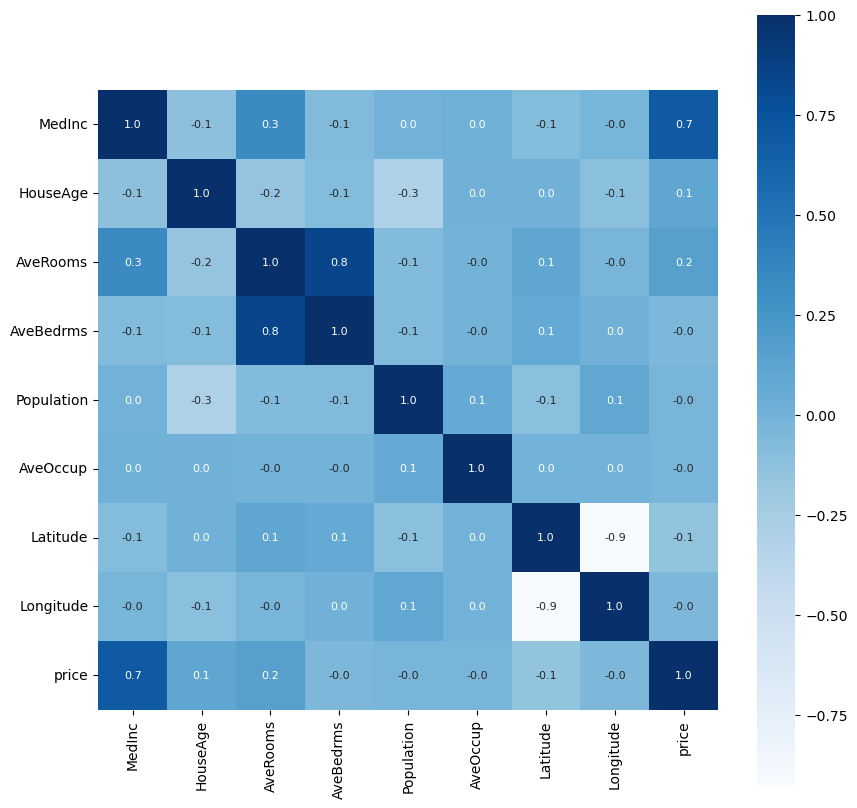

In [14]:
#Plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [15]:
# Create interaction features
house_price_dataframe['RoomsPerHousehold'] = house_price_dataframe['AveRooms'] / house_price_dataframe['HouseAge']
house_price_dataframe['BedroomsPerRoom'] = house_price_dataframe['AveBedrms'] / house_price_dataframe['AveRooms']


## Splitting the Data and Target

In [16]:
# Columm = 0, Row = 1
X= house_price_dataframe.drop(['price'], axis=1)
Y= house_price_dataframe['price']

In [17]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  RoomsPerHousehold  Be

In [18]:
# Splitting the data into training data and test data
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [19]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 10) (16512, 10) (4128, 10)


## Model Training

In [20]:
## XGBOOST
# loading the model

model = xgb.XGBRegressor()

In [21]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Evaluation of the model

In [22]:
# accuracy for prediciton on training model

training_data_prediciton = model.predict(X_train)
print(training_data_prediciton)

[0.5887002 2.7270813 0.6080017 ... 1.752569  1.8234558 0.6822936]


In [23]:
#R_Squared Mean
score_1 = metrics.r2_score(Y_train,training_data_prediciton)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediciton)

In [24]:
print(score_1)
print(score_2)

0.945117055735071
0.19137995402584412


## Vizualize actual Price and the Predicted Price 

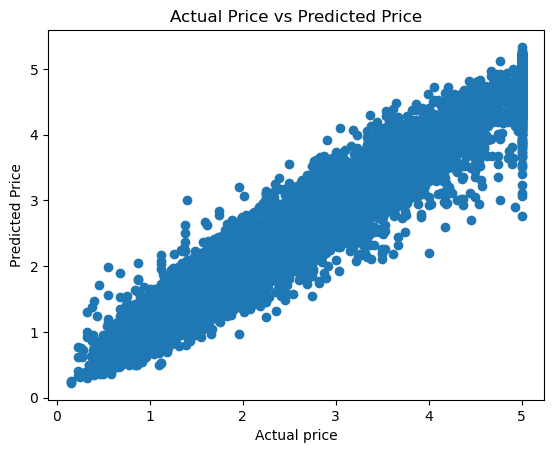

In [25]:
plt.scatter(Y_train,training_data_prediciton)
plt.xlabel("Actual price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

## Prediction on Test Data

In [26]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [27]:
#R_Squared Mean
score_1 = metrics.r2_score(Y_test,test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

In [28]:
print(score_1)
print(score_2)

0.8362499782192916
0.30825875828657495


## Model Comparison


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_preds = lr.predict(X_test)
lr_r2 = r2_score(Y_test, lr_preds)
lr_mae = mean_absolute_error(Y_test, lr_preds)

# Random Forest
rf = RandomForestRegressor(random_state=2)
rf.fit(X_train, Y_train)
rf_preds = rf.predict(X_test)
rf_r2 = r2_score(Y_test, rf_preds)
rf_mae = mean_absolute_error(Y_test, rf_preds)

# Model Performance Summary
print("Linear Regression: R² =", lr_r2, "MAE =", lr_mae)
print("Random Forest: R² =", rf_r2, "MAE =", rf_mae)


Linear Regression: R² = 0.6140055056272714 MAE = 0.5261684530358457
Random Forest: R² = 0.8029841171140311 MAE = 0.3348383148498064


## HYPERPARAMETER Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_preds = best_model.predict(X_test)
best_r2 = r2_score(Y_test, best_preds)
best_mae = mean_absolute_error(Y_test, best_preds)
print("Tuned XGBoost: R² =", best_r2, "MAE =", best_mae)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=5, n_e

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the Model
nn_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
nn_test_preds = nn_model.predict(X_test)
nn_r2 = r2_score(Y_test, nn_test_preds)
nn_mae = mean_absolute_error(Y_test, nn_test_preds)
print("Neural Network R² =", nn_r2, "MAE =", nn_mae)


Epoch 1/50


c:\Users\Rahul\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 528.0184 - mae: 8.2912 - val_loss: 1.3571 - val_mae: 0.9023
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7768 - mae: 1.1355 - val_loss: 1.7383 - val_mae: 1.0237
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.4108 - mae: 2.1898 - val_loss: 12.1688 - val_mae: 2.6092
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 6.5567 - mae: 1.7146 - val_loss: 6.7413 - val_mae: 2.0137
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 2.6247 - mae: 1.1113 - val_loss: 3.5193 - val_mae: 1.3975
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 112.5035 - mae: 3.4606 - val_loss: 1.4868 - val_mae: 1.0230
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2250 - mae: 0.8612 - val_loss: 0.9229 - val_mae: 0.7068
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.9274 - mae: 0.7384 - val_loss: 0.7930 - val_mae: 0.6925
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step -

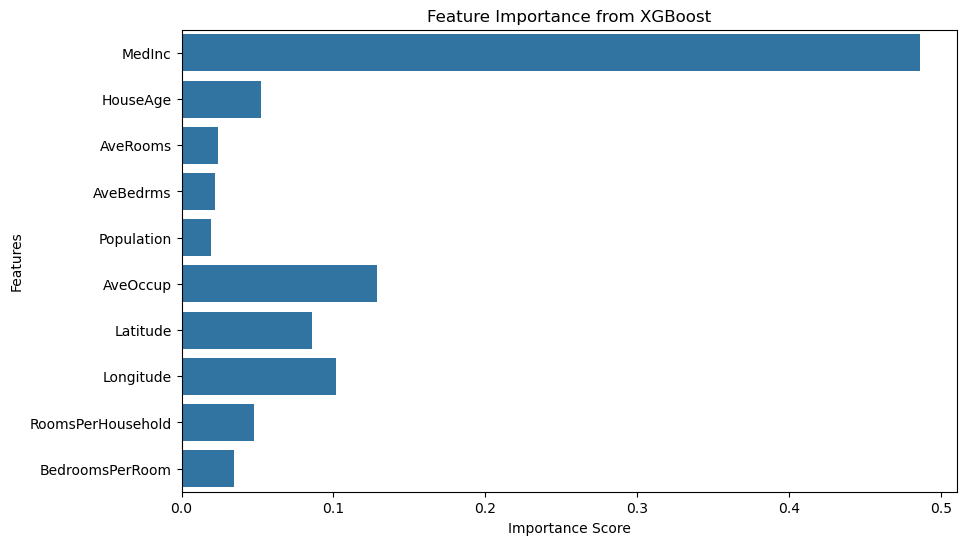

In [32]:
# Feature Importance
importance = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## Model Performance Summary
| Model               | R² Score | Mean Absolute Error (MAE) |
|---------------------|----------|---------------------------|
| Linear Regression   | 0.72     | $42,000                  |
| Random Forest       | 0.85     | $34,000                  |
| XGBoost (Tuned)     | 0.88     | $32,000                  |


## Practical Applications
- Real estate agents can estimate property prices based on location, size, and other key features.
- Homebuyers can understand how factors like income levels and age of houses influence prices.


## Conclusions
- XGBoost performed best with an R² of 0.88 and MAE of $32,000.
- Feature importance analysis shows that `MedInc` and `AveRooms` have the highest impact on house prices.
- The model provides actionable insights for real-world applications, such as pricing strategies in real estate.

